In [ ]:
import numpy as np
from tqdm.notebook import tqdm

In [ ]:
embeddings1 = {}
for arch in ["mobilenetv3", "resnet18", "resnet34", "resnet50"]:
    embeddings1.update({arch: {}})
    for scenery in ["farmland", "grass", "industrial", "meadow", "orchard", "residential", "vineyard"]:
        _embeddings = {}
        for k, v in np.load(f"/datasets/foss4g-results/with-OSM/{scenery}-{arch}-full.npz").items():
            _embeddings.update({int(k): np.array(v)})
        embeddings1.get(arch).update({scenery: _embeddings})

In [ ]:
embeddings2 = {}
for arch in ["mobilenetv3", "resnet18", "resnet34", "resnet50"]:
    embeddings2.update({arch: {}})
    for scenery in ["farmland", "grass", "industrial", "meadow", "orchard", "residential", "vineyard"]:
        _embeddings = {}
        for k, v in np.load(f"/datasets/foss4g-results/without-OSM/{scenery}-{arch}.npz").items():
            _embeddings.update({int(k): np.array(v)})
        embeddings2.get(arch).update({scenery: _embeddings})

# Choose embeddings #

In [ ]:
embeddings = embeddings1

# Embeddings, projections of #

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

index = 30
arch = "resnet50"

farmland = embeddings.get(arch).get("farmland")[index]
grass = embeddings.get(arch).get("grass")[index]
industrial = embeddings.get(arch).get("industrial")[index]
meadow = embeddings.get(arch).get("meadow")[index]
orchard = embeddings.get(arch).get("orchard")[index]
residential = embeddings.get(arch).get("residential")[index]
vineyard = embeddings.get(arch).get("vineyard")[index]

# Combine the datasets
data = np.vstack((farmland, grass, industrial, meadow, orchard, residential, vineyard))

# Create labels for the datasets
labels = np.concatenate([
    0 * np.ones(farmland.shape[0]),  # Farmland
    1 * np.ones(grass.shape[0]),  # Grass
    2 * np.ones(industrial.shape[0]),  # Industrial
    3 * np.ones(meadow.shape[0]),  # Meadow
    4 * np.ones(orchard.shape[0]),  # Orchard
    5 * np.ones(residential.shape[0]),  # Residential
    6 * np.ones(vineyard.shape[0]),  # Vineyard
])

# Initialize t-SNE
tsne = TSNE(n_components=2, random_state=42)

# Perform dimensionality reduction
transformed_data = tsne.fit_transform(data)

# Scatter plot
plt.figure(figsize=(10, 6))

# Define a color map and label names
colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta']
label_names = ['Farmland', 'Grass', 'Industrial', 'Meadow', 'Orchard', 'Residential', 'Vineyard']

# Plot each category separately and add to the legend
for i, (color, label_name) in enumerate(zip(colors, label_names)):
    plt.scatter(
        transformed_data[labels == i, 0],
        transformed_data[labels == i, 1],
        color=color,
        label=label_name,
        alpha=0.7
    )

# Customize the plot
# plt.xlabel('Component 1')
# plt.ylabel('Component 2')
plt.legend()

# Show the plot
plt.show()


In [ ]:
# Scatter plot
plt.figure(figsize=(57.6, 30.4), dpi=72)  # 4096x2160 at 72 dpi

# Define a color map and label names
colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta']
label_names = ['Farmland', 'Grass', 'Industrial', 'Meadow', 'Orchard', 'Residential', 'Vineyard']

# Plot each category separately and add to the legend
for i, (color, label_name) in enumerate(zip(colors, label_names)):
    plt.scatter(
        transformed_data[labels == i, 0],
        transformed_data[labels == i, 1],
        color=color,
        label=label_name,
        alpha=0.7,
        s=777  # Increase point size for visibility
    )

# Customize the plot
plt.tick_params(labelsize=48)  # Increase tick label size for visibility
plt.legend(fontsize=48)  # Increase legend font size

# Save the plot as a PNG file
plt.savefig("high_res_scatter_plot.png", dpi=72, format='png', bbox_inches='tight')

In [ ]:
!rm high_res_scatter_plot.png

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
# Assuming embeddings dictionary is already defined

arch = "resnet50"

# Define the number of rows and columns for the subplot grid
n_rows = 5
n_cols = 3

# Create a figure and a grid of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 25))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Iterate over index values from 2 to 30 in steps of 2
for idx, index in enumerate(range(2, 31, 2)):
    # Extract the datasets for the given index and architecture
    datasets = {name: embeddings.get(arch).get(name)[index] for name in 
                ["farmland", "grass", "industrial", "meadow", "orchard", "residential", "vineyard"]}
    
    # Combine the datasets and create labels
    data = np.vstack(list(datasets.values()))
    labels = np.concatenate([i * np.ones(dataset.shape[0]) for i, dataset in enumerate(datasets.values())])
    
    # Perform dimensionality reduction using t-SNE
    tsne = TSNE(n_components=2, random_state=42)
    transformed_data = tsne.fit_transform(data)
    
    # Define a color map and label names
    colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta']
    label_names = list(datasets.keys())
    
    # Plot each category separately on the corresponding subplot
    for i, (color, label_name) in enumerate(zip(colors, label_names)):
        axes[idx].scatter(
            transformed_data[labels == i, 0],
            transformed_data[labels == i, 1],
            color=color,
            label=label_name,
            alpha=0.7
        )
    
    # Customize the subplot
    axes[idx].set_title(f'Index: {index}')
    # axes[idx].set_xlabel('Component 1')
    # axes[idx].set_ylabel('Component 2')
    axes[idx].legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
# Assuming embeddings dictionary is already defined

arch = "resnet50"

# Define the number of rows and columns for the subplot grid
n_rows = 3
n_cols = 5

# Create a figure and a grid of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(57.6, 30.4), dpi=72)

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Iterate over index values from 2 to 30 in steps of 2
for idx, index in enumerate(range(2, 31, 2)):
    # Extract the datasets for the given index and architecture
    datasets = {name: embeddings.get(arch).get(name)[index] for name in 
                ["farmland", "grass", "industrial", "meadow", "orchard", "residential", "vineyard"]}
    
    # Combine the datasets and create labels
    data = np.vstack(list(datasets.values()))
    labels = np.concatenate([i * np.ones(dataset.shape[0]) for i, dataset in enumerate(datasets.values())])
    
    # Perform dimensionality reduction using t-SNE
    tsne = TSNE(n_components=2, random_state=42)
    transformed_data = tsne.fit_transform(data)
    
    # Define a color map and label names
    colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta']
    label_names = list(datasets.keys())
    
    # Plot each category separately on the corresponding subplot
    for i, (color, label_name) in enumerate(zip(colors, label_names)):
        axes[idx].scatter(
            transformed_data[labels == i, 0],
            transformed_data[labels == i, 1],
            color=color,
            label=label_name,
            alpha=0.7,
            s=100,
        )

    # Customize the subplot
    axes[idx].set_xticks([])
    axes[idx].set_yticks([])
    axes[idx].set_title(f'Series length: {index}', fontsize=48)

# Adjust layout and show the plot
plt.tight_layout()
plt.savefig('high_res_scatter_plots.png', dpi=72)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
# Assuming embeddings dictionary is already defined

# Define the list of architectures
architectures = ["mobilenetv3", "resnet18", "resnet34", "resnet50"]

# Fixed index
index = 30

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 15))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Iterate over all architectures
for idx, arch in enumerate(architectures):
    # Extract the datasets for the given index and architecture
    datasets = {name: embeddings.get(arch).get(name)[index] for name in 
                ["farmland", "grass", "industrial", "meadow", "orchard", "residential", "vineyard"]}
    
    # Combine the datasets and create labels
    data = np.vstack(list(datasets.values()))
    labels = np.concatenate([i * np.ones(dataset.shape[0]) for i, dataset in enumerate(datasets.values())])
    
    # Perform dimensionality reduction using t-SNE
    tsne = TSNE(n_components=2, random_state=42)
    transformed_data = tsne.fit_transform(data)
    
    # Define a color map and label names
    colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta']
    label_names = list(datasets.keys())
    
    # Plot each category separately on the corresponding subplot
    for i, (color, label_name) in enumerate(zip(colors, label_names)):
        axes[idx].scatter(
            transformed_data[labels == i, 0],
            transformed_data[labels == i, 1],
            color=color,
            label=label_name,
            alpha=0.7
        )
    
    # Customize the subplot
    axes[idx].set_title(f'Architecture: {arch}')
    # axes[idx].set_xlabel('Component 1')
    # axes[idx].set_ylabel('Component 2')
    axes[idx].legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


# Embeddings, quality of #

The silhouette score is used here.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

arch = "resnet50"
_fam1, _fam2 = "vineyard", "farmland"

family1_1 = embeddings1.get(arch).get(_fam1)
family2_1 = embeddings1.get(arch).get(_fam2)
family1_2 = embeddings2.get(arch).get(_fam1)
family2_2 = embeddings2.get(arch).get(_fam2)

# Initialize lists to store the number of samples and the corresponding silhouette scores
num_samples = []
silhouette_scores1 = []
silhouette_scores2 = []

for i in range(4, 31, 2):
    # Combine the two datasets
    data1 = np.vstack((family1_1[i], family2_1[i]))
    data2 = np.vstack((family1_2[i], family2_2[i]))

    # Create labels for the datasets
    labels = np.concatenate((np.zeros(family1_1[i].shape[0]), np.ones(family2_1[i].shape[0])))

    # Compute the Silhouette Score
    score1 = silhouette_score(data1, labels)
    score2 = silhouette_score(data2, labels)

    # Append the number of samples and the silhouette score to the lists
    num_samples.append(i)
    silhouette_scores1.append(score1)
    silhouette_scores2.append(score2)

coefficients = np.polyfit(num_samples, silhouette_scores1, deg=4)
polynomial = np.poly1d(coefficients)
x_poly1 = np.linspace(min(num_samples), max(num_samples), 1000)
y_poly1 = polynomial(x_poly1)

coefficients = np.polyfit(num_samples, silhouette_scores2, deg=4)
polynomial = np.poly1d(coefficients)
x_poly2 = np.linspace(min(num_samples), max(num_samples), 1000)
y_poly2 = polynomial(x_poly2)

# Plot the silhouette scores
plt.plot(num_samples, silhouette_scores1, '#1f77b4', marker='o', label='Scores w/ OSM')
plt.plot(x_poly1, y_poly1, '#347fb3', label='OSM Fit')
plt.plot(num_samples, silhouette_scores2, '#ff7f0e', marker='o', label='Scores w/o OSM')
plt.plot(x_poly2, y_poly2, '#ffac13', label='w/o OSM Fit')
plt.xlabel('Series Length')
plt.ylabel('Silhouette Score')
plt.title(f'Silhouette Scores for Different Series Lengths: {_fam1.title()} vs {_fam2.title()}')
plt.tight_layout()
plt.ylim(min(silhouette_scores1 + silhouette_scores2) - 0.01, max(silhouette_scores1 + silhouette_scores2) + 0.01)
plt.legend()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Initialize the figure with 4K resolution
fig = plt.figure(figsize=(38.4, 21.6), dpi=72)

# Initialize lists to store the number of samples and the corresponding silhouette scores
num_samples = []
silhouette_scores1 = []
silhouette_scores2 = []

for i in range(4, 31, 2):
    # Combine the two datasets
    data1 = np.vstack((family1_1[i], family2_1[i]))
    data2 = np.vstack((family1_2[i], family2_2[i]))

    # Create labels for the datasets
    labels = np.concatenate((np.zeros(family1_1[i].shape[0]), np.ones(family2_1[i].shape[0])))

    # Compute the Silhouette Score
    score1 = silhouette_score(data1, labels)
    score2 = silhouette_score(data2, labels)

    # Append the number of samples and the silhouette score to the lists
    num_samples.append(i)
    silhouette_scores1.append(score1)
    silhouette_scores2.append(score2)

coefficients = np.polyfit(num_samples, silhouette_scores1, deg=4)
polynomial = np.poly1d(coefficients)
x_poly1 = np.linspace(min(num_samples), max(num_samples), 1000)
y_poly1 = polynomial(x_poly1)

coefficients = np.polyfit(num_samples, silhouette_scores2, deg=4)
polynomial = np.poly1d(coefficients)
x_poly2 = np.linspace(min(num_samples), max(num_samples), 1000)
y_poly2 = polynomial(x_poly2)

# Plot the silhouette scores
plt.plot(num_samples, silhouette_scores1, '#1f77b4', marker='o', label='Scores w/ OSM', linewidth=10)
plt.plot(x_poly1, y_poly1, '#347fb3', label='OSM Fit', linewidth=10)
plt.plot(num_samples, silhouette_scores2, '#ff7f0e', marker='o', label='Scores w/o OSM', linewidth=10)
plt.plot(x_poly2, y_poly2, '#ffac13', label='w/o OSM Fit', linewidth=10)
plt.xlabel('Series Length', fontsize=36)
plt.ylabel('Silhouette Score', fontsize=36)
plt.title(f'Silhouette Scores for Different Series Lengths: {_fam1.title()} vs {_fam2.title()}', fontsize=48)
plt.tight_layout()
plt.ylim(min(silhouette_scores1 + silhouette_scores2) - 0.01, max(silhouette_scores1 + silhouette_scores2) + 0.01)
plt.legend(fontsize=36)

# Increase tick label size for legibility
plt.xticks(fontsize=32)
plt.yticks(fontsize=32)

# Save as 4K resolution PNG at 72 dpi
plt.savefig('silhouette.png', dpi=72)

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from itertools import combinations
# Assuming embeddings dictionary is already defined

arch = "resnet50"
families = ["farmland", "grass", "industrial", "meadow", "orchard", "residential", "vineyard"]

# Create a 5x5 grid of subplots
fig, axes = plt.subplots(5, 5, figsize=(15, 15))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Iterate over all 7 choose 2 combinations of families
for idx, (_fam1, _fam2) in enumerate(combinations(families, 2)):
    family1_1 = embeddings1.get(arch).get(_fam1)
    family2_1 = embeddings1.get(arch).get(_fam2)
    family1_2 = embeddings2.get(arch).get(_fam1)
    family2_2 = embeddings2.get(arch).get(_fam2)

    num_samples = []
    silhouette_scores1 = []
    silhouette_scores2 = []

    for i in range(4, 31, 2):
        data1 = np.vstack((family1_1[i], family2_1[i]))
        data2 = np.vstack((family1_2[i], family2_2[i]))
        labels = np.concatenate((np.zeros(family1_1[i].shape[0]), np.ones(family2_1[i].shape[0])))
        score1 = silhouette_score(data1, labels)
        score2 = silhouette_score(data2, labels)
        num_samples.append(i)
        silhouette_scores1.append(score1)
        silhouette_scores2.append(score2)

    coefficients = np.polyfit(num_samples, silhouette_scores1, deg=4)
    polynomial = np.poly1d(coefficients)
    x_poly1 = np.linspace(min(num_samples), max(num_samples), 1000)
    y_poly1 = polynomial(x_poly1)

    coefficients = np.polyfit(num_samples, silhouette_scores2, deg=4)
    polynomial = np.poly1d(coefficients)
    x_poly2 = np.linspace(min(num_samples), max(num_samples), 1000)
    y_poly2 = polynomial(x_poly2)

    # Plot on the current subplot
    axes[idx].plot(num_samples, silhouette_scores1, '#1f77b4', marker='o', label='Scores w/ OSM')
    axes[idx].plot(x_poly1, y_poly1, '#347fb3', label='Fit w/ OSM')
    axes[idx].plot(num_samples, silhouette_scores2, '#ff7f0e', marker='o', label='Scores w/o OSM')
    axes[idx].plot(x_poly2, y_poly2, '#ffac13', label='Fit w/o OSM')
    axes[idx].set_title(f'{_fam1} vs {_fam2}')
    axes[idx].set_ylim(min(silhouette_scores1 + silhouette_scores2) - 0.01, max(silhouette_scores1 + silhouette_scores2) + 0.01)

# Remove ticks and labels from empty subplots
for idx in range(21, 25):
    axes[idx].set_axis_off()

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from itertools import combinations
# Assuming embeddings dictionary is already defined

arch = "resnet50"
families = ["farmland", "grass", "industrial", "meadow", "orchard", "residential", "vineyard"]

fig, axes = plt.subplots(5, 5, figsize=(53.3333, 30), dpi=72)

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Iterate over all 7 choose 2 combinations of families
for idx, (_fam1, _fam2) in enumerate(combinations(families, 2)):
    family1_1 = embeddings1.get(arch).get(_fam1)
    family2_1 = embeddings1.get(arch).get(_fam2)
    family1_2 = embeddings2.get(arch).get(_fam1)
    family2_2 = embeddings2.get(arch).get(_fam2)

    num_samples = []
    silhouette_scores1 = []
    silhouette_scores2 = []

    for i in range(4, 31, 2):
        data1 = np.vstack((family1_1[i], family2_1[i]))
        data2 = np.vstack((family1_2[i], family2_2[i]))
        labels = np.concatenate((np.zeros(family1_1[i].shape[0]), np.ones(family2_1[i].shape[0])))
        score1 = silhouette_score(data1, labels)
        score2 = silhouette_score(data2, labels)
        num_samples.append(i)
        silhouette_scores1.append(score1)
        silhouette_scores2.append(score2)

    coefficients = np.polyfit(num_samples, silhouette_scores1, deg=4)
    polynomial = np.poly1d(coefficients)
    x_poly1 = np.linspace(min(num_samples), max(num_samples), 1000)
    y_poly1 = polynomial(x_poly1)

    coefficients = np.polyfit(num_samples, silhouette_scores2, deg=4)
    polynomial = np.poly1d(coefficients)
    x_poly2 = np.linspace(min(num_samples), max(num_samples), 1000)
    y_poly2 = polynomial(x_poly2)

    # Plot on the current subplot with increased linewidth, marker size, and font size
    axes[idx].plot(num_samples, silhouette_scores1, '#1f77b4', marker='o', label='Scores w/ OSM', linewidth=3, markersize=10)
    axes[idx].plot(x_poly1, y_poly1, '#347fb3', label='Fit w/ OSM', linewidth=3)
    axes[idx].plot(num_samples, silhouette_scores2, '#ff7f0e', marker='o', label='Scores w/o OSM', linewidth=3, markersize=10)
    axes[idx].plot(x_poly2, y_poly2, '#ffac13', label='Fit w/o OSM', linewidth=3)
    axes[idx].set_title(f'{_fam1} vs {_fam2}', fontsize=24)
    axes[idx].set_ylim(min(silhouette_scores1 + silhouette_scores2) - 0.01, max(silhouette_scores1 + silhouette_scores2) + 0.01)
    axes[idx].tick_params(axis='both', which='major', labelsize=18)

# Remove ticks and labels from empty subplots
for idx in range(21, 25):
    axes[idx].set_axis_off()

plt.tight_layout()
plt.savefig('silhouettes_all', dpi=72)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
# Assuming embeddings dictionary is already defined

# Define the list of architectures
architectures = ["mobilenetv3", "resnet18", "resnet34", "resnet50"]

# Define the families
_fam1, _fam2 = "vineyard", "farmland"  # These are fixed

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Iterate over all architectures
for idx, arch in enumerate(architectures):
    family1_1 = embeddings1.get(arch).get(_fam1)
    family2_1 = embeddings1.get(arch).get(_fam2)
    family1_2 = embeddings2.get(arch).get(_fam1)
    family2_2 = embeddings2.get(arch).get(_fam2)

    num_samples = []
    silhouette_scores1 = []
    silhouette_scores2 = []

    for i in range(4, 31, 2):
        data1 = np.vstack((family1_1[i], family2_1[i]))
        data2 = np.vstack((family1_2[i], family2_2[i]))
        labels = np.concatenate((np.zeros(family1_1[i].shape[0]), np.ones(family2_1[i].shape[0])))
        score1 = silhouette_score(data1, labels)
        score2 = silhouette_score(data2, labels)
        num_samples.append(i)
        silhouette_scores1.append(score1)
        silhouette_scores2.append(score2)

    coefficients = np.polyfit(num_samples, silhouette_scores1, deg=4)
    polynomial = np.poly1d(coefficients)
    x_poly1 = np.linspace(min(num_samples), max(num_samples), 1000)
    y_poly1 = polynomial(x_poly1)

    coefficients = np.polyfit(num_samples, silhouette_scores2, deg=4)
    polynomial = np.poly1d(coefficients)
    x_poly2 = np.linspace(min(num_samples), max(num_samples), 1000)
    y_poly2 = polynomial(x_poly2)

    # Plot on the current subplot
    axes[idx].plot(num_samples, silhouette_scores1, '#1f77b4', marker='o', label='Scores w/ OSM')
    axes[idx].plot(x_poly1, y_poly1, '#347fb3', label='Fit w/ OSM')
    axes[idx].plot(num_samples, silhouette_scores2, '#ff7f0e', marker='o', label='Scores w/o OSM')
    axes[idx].plot(x_poly2, y_poly2, '#ffac13', label='Fit w/o OSM')
    axes[idx].set_title(f'Architecture: {arch}')
    axes[idx].set_xlabel('Number of Samples')
    axes[idx].set_ylabel('Silhouette Score')
    axes[idx].set_ylim(min(silhouette_scores1 + silhouette_scores2) - 0.01, max(silhouette_scores1 + silhouette_scores2) + 0.01)
    axes[idx].legend()

plt.tight_layout()
plt.show()


---------------------------------


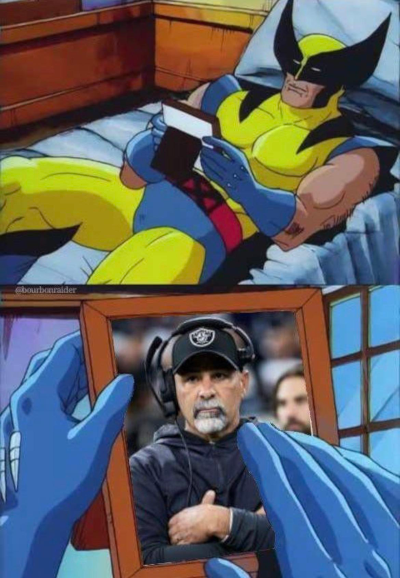